In [1]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats, leaguedashteamptshot
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_50018/1093523805.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
miami_wide_open_rounds = []

miami_4_6 = []

miami_2_4 = []

miami_0_2 = []


for i in tqdm([1, 2, 3]):

    miami = leaguedashteamptshot.LeagueDashTeamPtShot(league_id='00', 
                                                      per_mode_simple='PerGame',
                                                      season='2022-23',
                                                      season_type_all_star='Playoffs',
                                                      team_id_nullable=1610612748,
                                                      close_def_dist_range_nullable='6+ Feet - Wide Open', 
                                                      po_round_nullable=i).get_data_frames()[0]
    miami_wide_open_rounds.append(miami)
    time.sleep(1)
    
    miami = leaguedashteamptshot.LeagueDashTeamPtShot(league_id='00', 
                                                      per_mode_simple='PerGame',
                                                      season='2022-23',
                                                      season_type_all_star='Playoffs',
                                                      team_id_nullable=1610612748,
                                                      close_def_dist_range_nullable='4-6 Feet - Open', 
                                                      po_round_nullable=i).get_data_frames()[0]
    
    miami_4_6.append(miami)
    time.sleep(1)
    
    miami = leaguedashteamptshot.LeagueDashTeamPtShot(league_id='00', 
                                                      per_mode_simple='PerGame',
                                                      season='2022-23',
                                                      season_type_all_star='Playoffs',
                                                      team_id_nullable=1610612748,
                                                      close_def_dist_range_nullable='2-4 Feet - Tight', 
                                                      po_round_nullable=i).get_data_frames()[0]
    miami_2_4.append(miami)
    time.sleep(1)
    

    miami = leaguedashteamptshot.LeagueDashTeamPtShot(league_id='00', 
                                                      per_mode_simple='PerGame',
                                                      season='2022-23',
                                                      season_type_all_star='Playoffs',
                                                      team_id_nullable=1610612748,
                                                      close_def_dist_range_nullable='0-2 Feet - Very Tight', 
                                                      po_round_nullable=i).get_data_frames()[0]
    miami_0_2.append(miami)
    time.sleep(1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.19s/it]


In [3]:
for i in range(3):
    print(miami_2_4[i]['FG3A'])

0    6.6
Name: FG3A, dtype: float64
0    9.5
Name: FG3A, dtype: float64
0    7.0
Name: FG3A, dtype: float64


In [4]:
fr_wide, sr_wide, tr_wide = miami_wide_open_rounds

miami_contested = []

for i in range(3):
    round_constested_made = (miami_0_2[i]['FG3M'] + miami_2_4[i]['FG3M'] + miami_4_6[i]['FG3M'])
    round_constested_attempted = miami_0_2[i]['FG3A'] + miami_2_4[i]['FG3A'] + miami_4_6[i]['FG3A']
    
    miami_contested.append([round_constested_made, round_constested_attempted])

In [5]:
miami_contested[0]

[0    11.0
 Name: FG3M, dtype: float64,
 0    23.8
 Name: FG3A, dtype: float64]

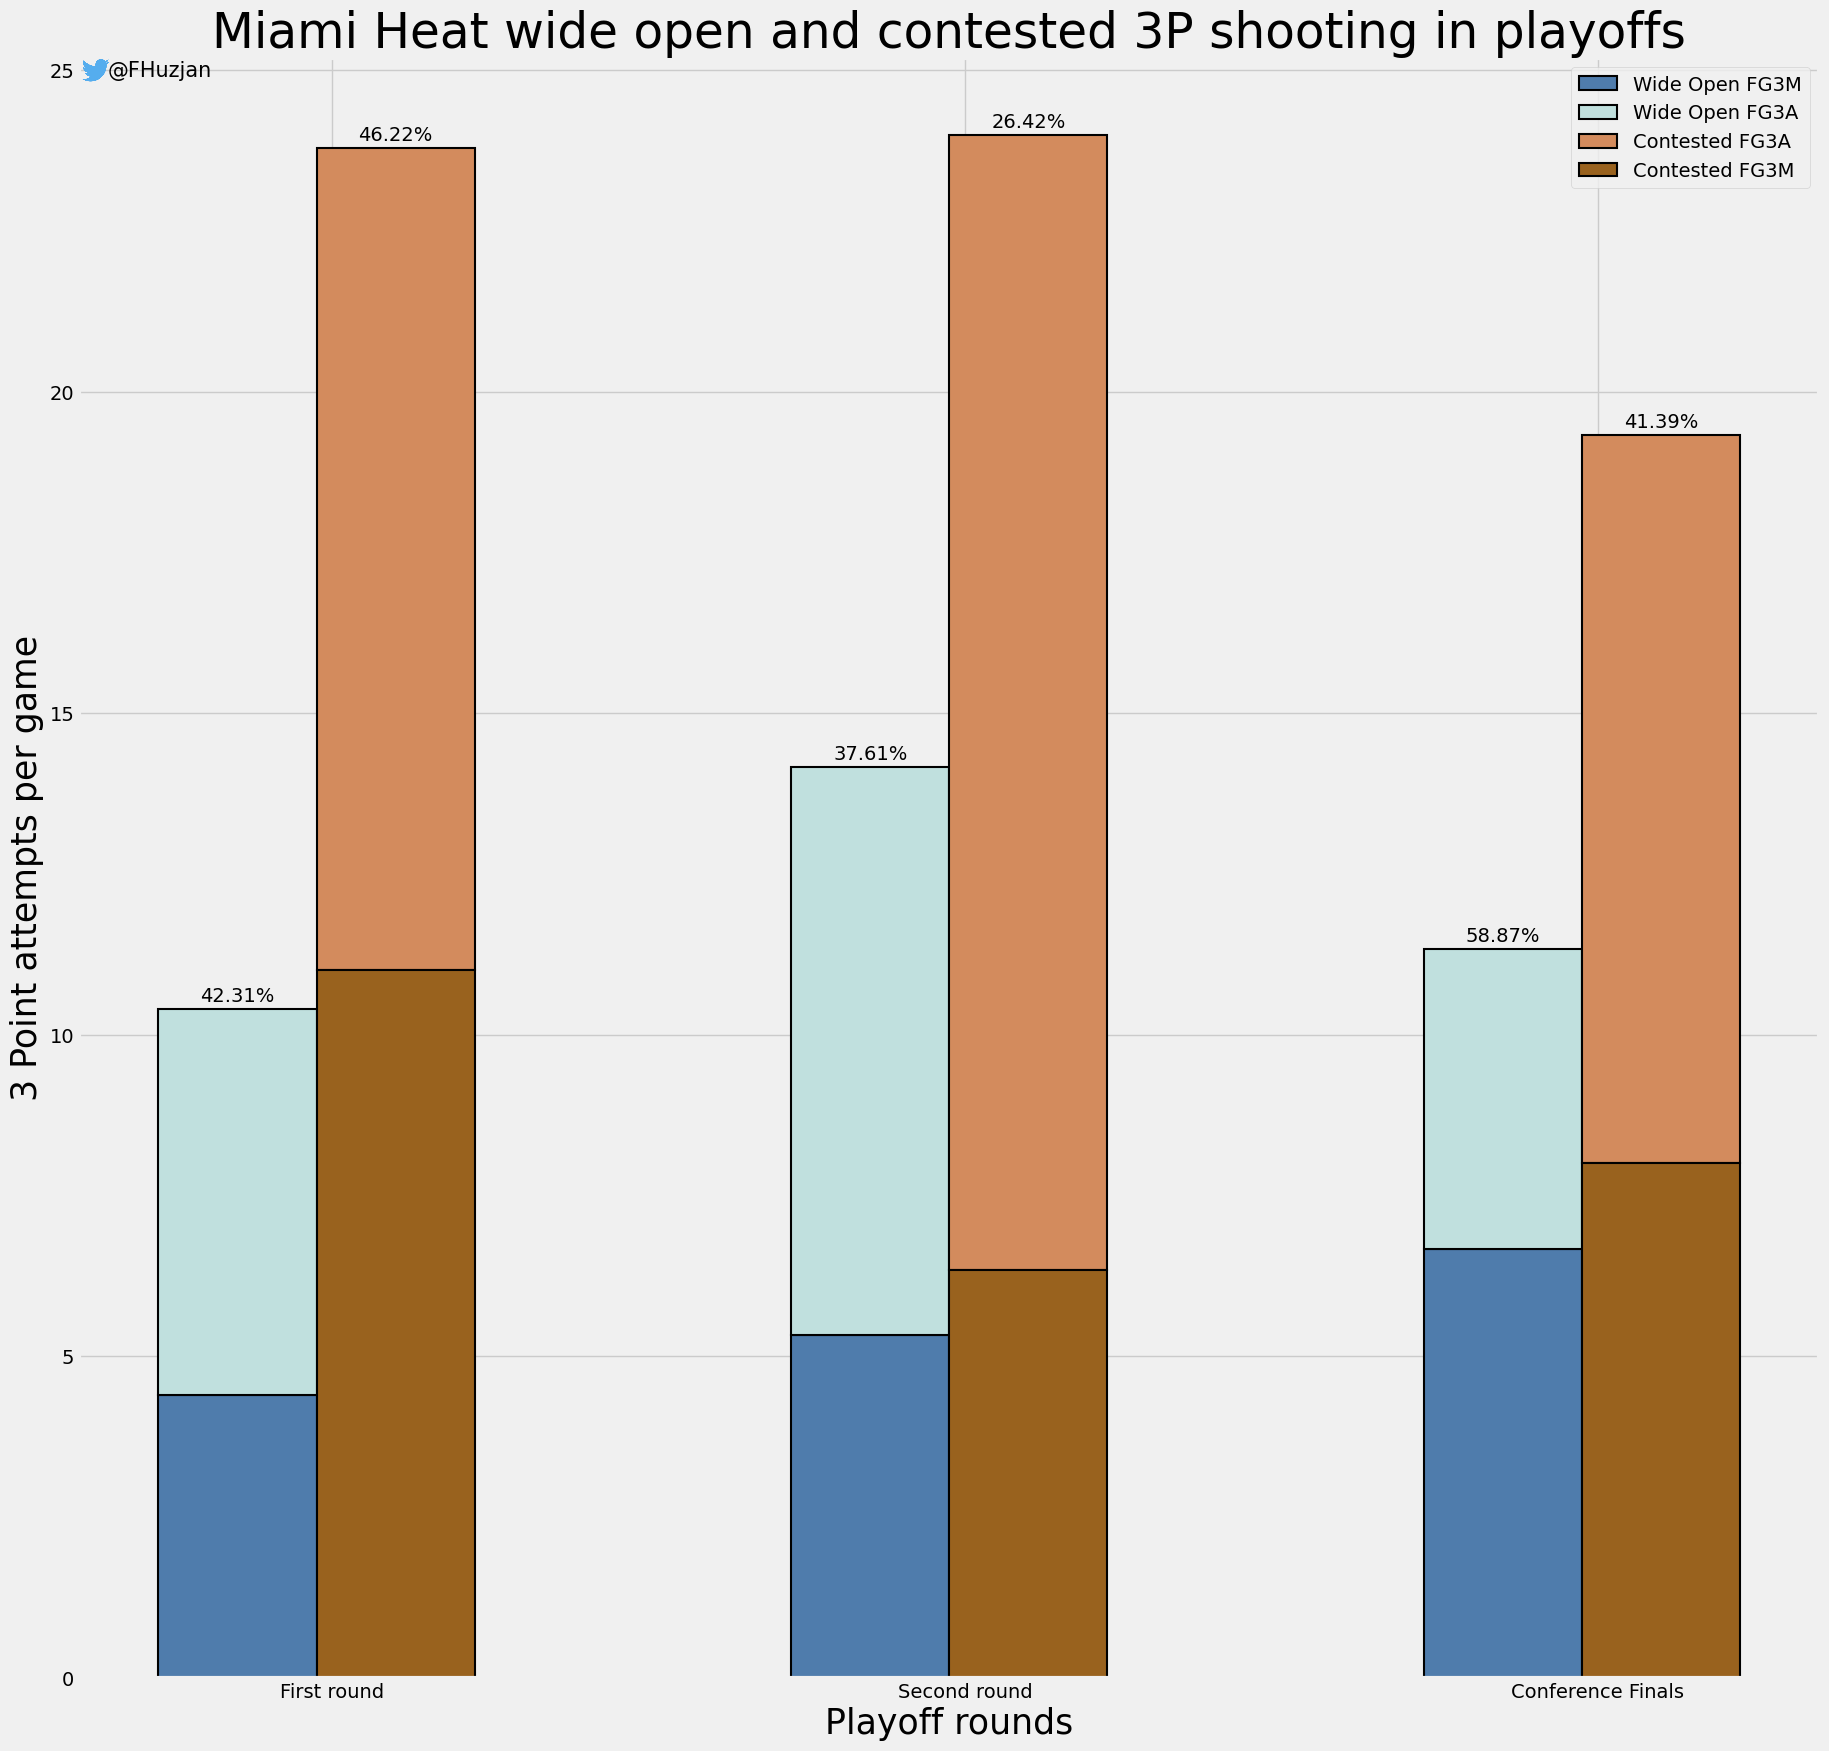

In [59]:
round_mapping = {
    0: 'First round',
    1: 'Second round',
    2: 'Conference Finals'
}

fig, ax = plt.subplots(figsize=(20, 20))

# wide_made_color = "#0A8754"
# wide_attempted_color = "#d55e00"

# contested_made_color = "#96C5B0"
# contested_attempted_color = "#553555"

wide_made_color = "#4F7CAC"
wide_attempted_color = "#C0E0DE"

contested_made_color = "#99621E"
contested_attempted_color = "#D38B5D"

edge_color = "black"
linewidth = 1.5

for i, round_ in enumerate(miami_wide_open_rounds):
    
    contested_made, contested_attempted = miami_contested[i]
    
    x = i
    
    if i == 0:
        ax.bar(x, round_['FG3M'], color=wide_made_color, label='Wide Open FG3M', width=0.25, edgecolor=edge_color, linewidth=linewidth)
        ax.bar(x, round_['FG3A'] - round_['FG3M'], bottom=round_['FG3M'], color=wide_attempted_color, label='Wide Open FG3A', width=0.25, edgecolor=edge_color, linewidth=linewidth)
        ax.bar(x + 0.25 , contested_attempted - contested_made, bottom=contested_made, color=contested_attempted_color, width=0.25, label='Contested FG3A', edgecolor=edge_color, linewidth=linewidth)
        ax.bar(x + 0.25 , contested_made, color=contested_made_color, width=0.25, label='Contested FG3M', edgecolor=edge_color, linewidth=linewidth)

    else:
        ax.bar(x, round_['FG3M'], color=wide_made_color, width=0.25, edgecolor=edge_color, linewidth=linewidth)
        ax.bar(x, round_['FG3A'] - round_['FG3M'], bottom=round_['FG3M'], color=wide_attempted_color, width=0.25, edgecolor=edge_color, linewidth=linewidth)
        ax.bar(x + 0.25 , contested_attempted - contested_made, bottom=contested_made, color=contested_attempted_color, width=0.25, edgecolor=edge_color, linewidth=linewidth)
        ax.bar(x + 0.25 , contested_made, color=contested_made_color, width=0.25, edgecolor=edge_color, linewidth=linewidth)

    
    perc = round_['FG3M'] / round_['FG3A']
    perc = np.round(perc * 100, 2)[0]
    ab_regular = AnnotationBbox(TextArea(f'{perc}%'), (x, round_['FG3A'] + 0.2), frameon=False)
    ax.add_artist(ab_regular)
    
    perc = contested_made / contested_attempted
    perc = np.round(perc * 100, 2)[0]
    ab_regular = AnnotationBbox(TextArea(f'{perc}%'), (x + 0.25, contested_attempted + 0.2), frameon=False)
    ax.add_artist(ab_regular)

ax.set_xlabel("Playoff rounds", fontsize=25)
ax.set_ylabel("3 Point attempts per game", fontsize=25)
ax.set_xticks([0.15, 1.15, 2.15])
ax.set_xticklabels((list(round_mapping.values())))
plt.legend()
plt.title('Miami Heat wide open and contested 3P shooting in playoffs', fontsize=35)
ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (-0.225, 25), frameon=False)
ax.add_artist(ab)
ax.text(x=-0.04, y=24.90, ha='right', s='@FHuzjan', size=15)

plt.savefig('miami_wide_contested.png')